# Customer Segmentation with KNN

In [1]:
# Importing our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# Loading our data 
train = pd.read_csv('train.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
# Changing our target variable to numeric
#mappings = {'A':1, 'B':2, 'C':3, 'D':4}
#train['Segmentation'] = train['Segmentation'].map(mappings)

In [4]:
# Checking the first few rows
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
# Droppping rows that are not needed
train = train.drop(['ID', 'Var_1'], axis = 1)

### Getting more insight about our data

In [6]:
train.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [8]:
train.Ever_Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
train.Ever_Married.value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [10]:
train['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
train['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [12]:
#  The % of missing values in Graduated column
train['Graduated'].isnull().sum() / train.shape[0] * 100

0.9667823500247893

In [13]:
#  The % of missing values in Ever_Married column
train['Ever_Married'].isnull().sum() / train.shape[0] * 100

1.7352503718393655

In [14]:
# The number of entries in our dataset
total_entries = train.shape[0]
total_entries

8068

In [15]:
# The number of missing values in our dataset
train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

###  Visuals

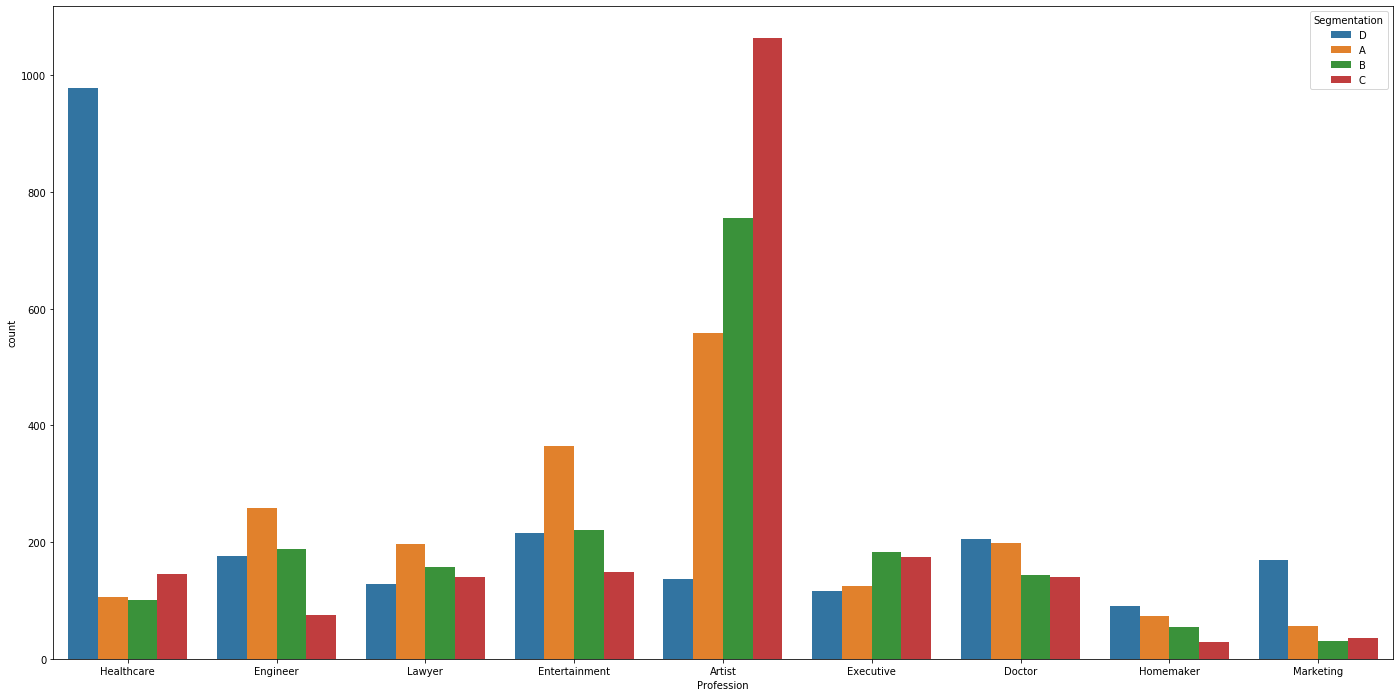

In [16]:
plt.rcParams['figure.figsize'] = (24, 12)
sns.countplot('Profession', hue = 'Segmentation', data = train)

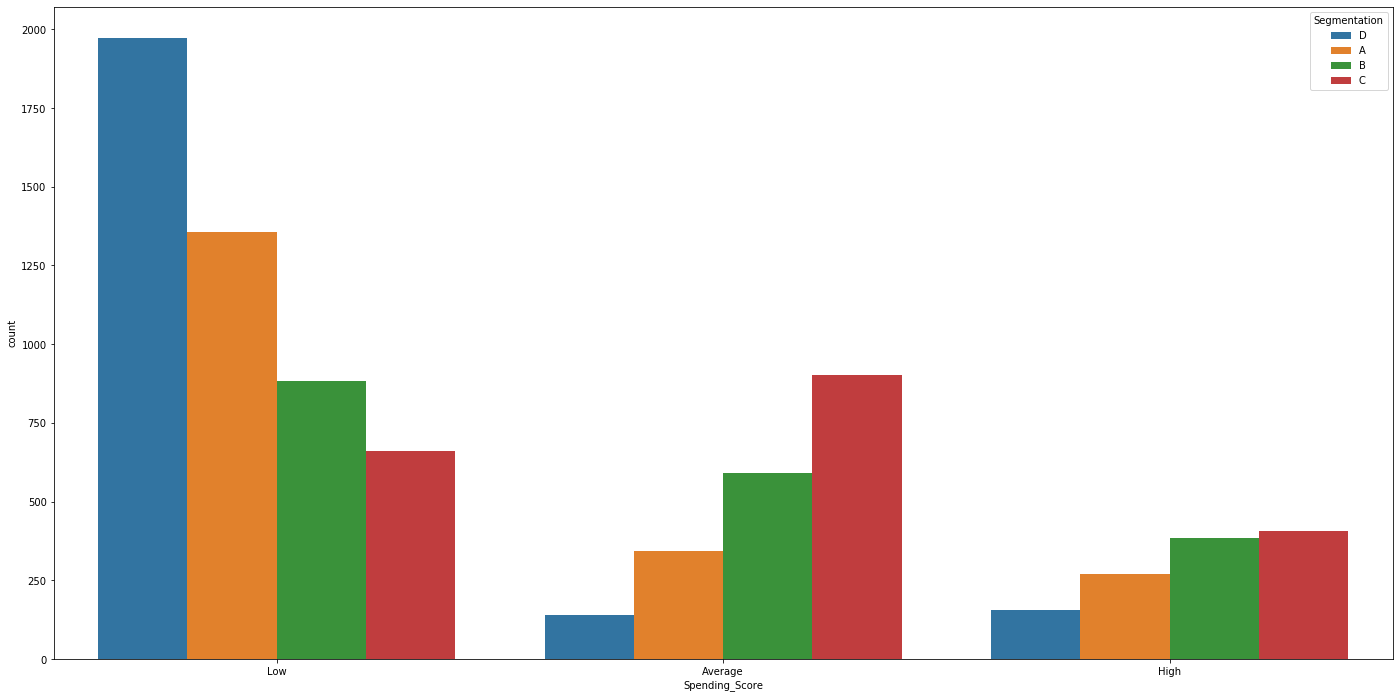

In [17]:
sns.countplot('Spending_Score', hue = 'Segmentation', data = train)

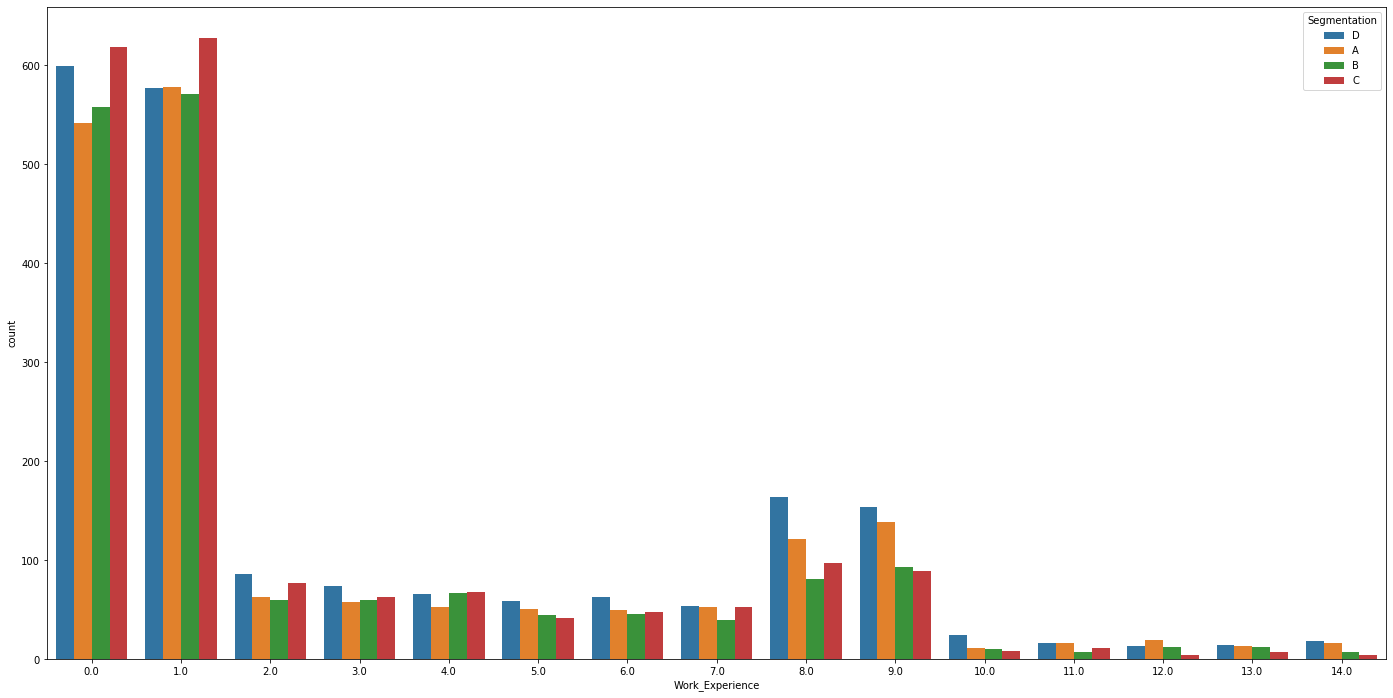

In [18]:
sns.countplot('Work_Experience', hue = 'Segmentation', data = train)

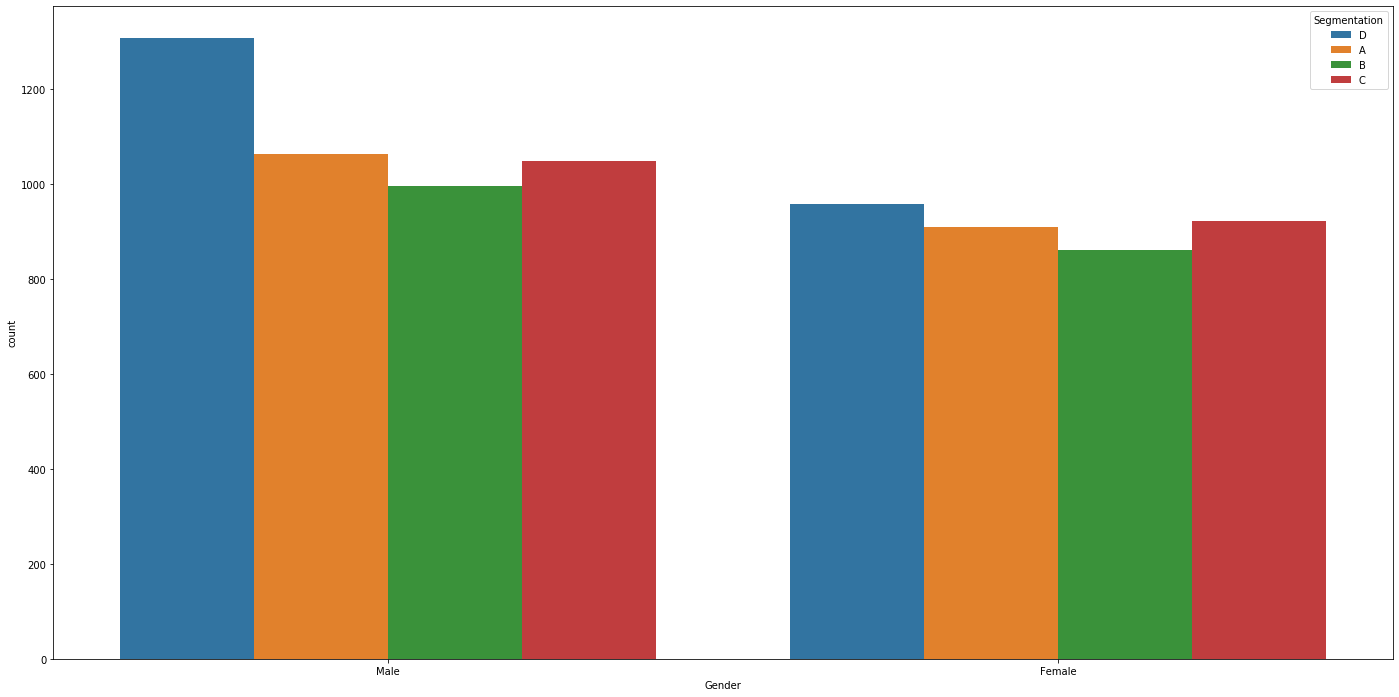

In [19]:
sns.countplot('Gender', hue = 'Segmentation', data = train)

Visualizations doesn't show much information about what feature dominates a particular segmentation. So, we would need an algorithm like KNN or other deep learning models to get the insights.

###  Preprocessing

In [20]:
train['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [21]:
median_family_size = train['Family_Size'].median()
median_family_size

3.0

In [22]:
# Replacing the missing values with the median value
train['Family_Size'].replace(np.nan, median_family_size, inplace = True)
train['Family_Size'].value_counts()

2.0    2390
3.0    1832
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [23]:
median_family_size = train['Work_Experience'].median()
median_family_size

1.0

In [24]:
# Replacing the missing values with the median value
train['Work_Experience'].replace(np.nan, median_family_size, inplace = True)
train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Segmentation         0
dtype: int64

In [25]:
# Replacing the missing profession values
train['Profession'].replace(np.nan, 'Not stated', inplace = True)

In [26]:
train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not stated'],
      dtype=object)

In [27]:
train.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [28]:
train['Gender'] = train['Gender'].astype('str')
train['Ever_Married'] = train['Ever_Married'].astype('str')
train['Graduated'] = train['Graduated'].astype('str')

In [29]:
enc = LabelEncoder()
train['gender'] = enc.fit_transform(train['Gender'])
train['ever_married'] = enc.fit_transform(train['Ever_Married'])
train['graduated'] = enc.fit_transform(train['Graduated'])
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1,0,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A,0,1,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0,1,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,1,1,1
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,A,0,1,1


<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

In [30]:
df = train.drop(['Gender', 'Ever_Married', 'Graduated'], axis = 1)
df.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,22,Healthcare,1.0,Low,4.0,D,1,0,0
1,38,Engineer,1.0,Average,3.0,A,0,1,1
2,67,Engineer,1.0,Low,1.0,B,0,1,1
3,67,Lawyer,0.0,High,2.0,B,1,1,1
4,40,Entertainment,1.0,High,6.0,A,0,1,1


In [31]:
#df = df.drop(['Profession'], axis = 1)

In [32]:
mapping = {'Low': 1, 'Average': 2, 'High': 3}
df['Spending_Score'] = df['Spending_Score'].map(mapping)
df.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,22,Healthcare,1.0,1,4.0,D,1,0,0
1,38,Engineer,1.0,2,3.0,A,0,1,1
2,67,Engineer,1.0,1,1.0,B,0,1,1
3,67,Lawyer,0.0,3,2.0,B,1,1,1
4,40,Entertainment,1.0,3,6.0,A,0,1,1


In [33]:
small_df = pd.get_dummies(df['Profession'])
small_df

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,0,1
8064,0,0,0,0,1,0,0,0,0,0
8065,0,0,0,0,0,1,0,0,0,0
8066,0,0,0,0,0,1,0,0,0,0


In [34]:
df = pd.concat([df, small_df], axis = 1)
df

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,Healthcare,1.0,1,4.0,D,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,Engineer,1.0,2,3.0,A,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,Engineer,1.0,1,1.0,B,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,Lawyer,0.0,3,2.0,B,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,Entertainment,1.0,3,6.0,A,0,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,Not stated,0.0,1,7.0,D,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,35,Executive,3.0,1,4.0,D,1,0,0,0,0,0,0,1,0,0,0,0,0
8065,33,Healthcare,1.0,1,1.0,D,0,0,1,0,0,0,0,0,1,0,0,0,0
8066,27,Healthcare,1.0,1,4.0,B,0,0,1,0,0,0,0,0,1,0,0,0,0


In [35]:
df.drop(['Profession'], axis = 1, inplace = True)


In [36]:
df.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,1.0,1,4.0,D,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,1.0,2,3.0,A,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,1.0,1,1.0,B,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,0.0,3,2.0,B,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,1.0,3,6.0,A,0,1,1,0,0,0,1,0,0,0,0,0,0


In [37]:
df.shape

(8068, 18)

In [38]:
# X, y = train.drop('Segmentation', axis = 1), train['Segmentation']
# X.head()

In [39]:
X, y = df.drop('Segmentation', axis = 1), df['Segmentation']
X.head()

,Age,Work_Experience,Spending_Score,Family_Size,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,1.0,1,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,1.0,2,3.0,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,0.0,3,2.0,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,1.0,3,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [40]:
#X = df[['Age', 'Work_Experience']]

In [41]:
y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [42]:
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(X)
# scaled_df[:10]

In [43]:
# Scaling our features so that the large values don't have much extra effect on the model that it should have
scaler = MinMaxScaler()
X['scaled_age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
X['scaled_Work_Experience'] = scaler.fit_transform(X['Work_Experience'].values.reshape(-1,1))
X['scaled_Family_size'] = scaler.fit_transform(X['Family_Size'].values.reshape(-1,1))
X.head()                                              

,Age,Work_Experience,Spending_Score,Family_Size,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated,scaled_age,scaled_Work_Experience,scaled_Family_size
0,22,1.0,1,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.056338,0.071429,0.375
1,38,1.0,2,3.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.281690,0.071429,0.250
2,67,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.690141,0.071429,0.000
3,67,0.0,3,2.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.690141,0.000000,0.125
4,40,1.0,3,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.309859,0.071429,0.625


In [44]:
X['scaled_age'].max()
X['Age'].max()

89

In [45]:
#Dropping the original, unscaled features
X.drop(['Age', 'Work_Experience','Family_Size'], axis = 1, inplace = True)

In [46]:
X.head()

,Spending_Score,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated,scaled_age,scaled_Work_Experience,scaled_Family_size
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0.056338,0.071429,0.375
1,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0.281690,0.071429,0.250
2,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0.690141,0.071429,0.000
3,3,1,1,1,0,0,0,0,0,0,0,1,0,0,0.690141,0.000000,0.125
4,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0.309859,0.071429,0.625


In [47]:
#Splitting our dataset in preparation for model application
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [48]:
#Instantiating and fitting our model
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [49]:
# Predicting our model
y_pred = knn.predict(X_test)

In [50]:
# Checking our training score
print(accuracy_score(y_train, knn.predict(X_train)))

0.6552635927945795


In [51]:
# checking our testing score
print(accuracy_score(y_test, y_pred))

0.48339117501239465


In [52]:
y_pred[:10]

array(['A', 'D', 'C', 'D', 'A', 'A', 'D', 'B', 'A', 'D'], dtype=object)

In [53]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.40      0.51      0.45       493
           B       0.37      0.32      0.34       465
           C       0.50      0.44      0.47       492
           D       0.65      0.63      0.64       567

    accuracy                           0.48      2017
   macro avg       0.48      0.48      0.47      2017
weighted avg       0.49      0.48      0.48      2017

[[252  95  57  89]
 [146 148 122  49]
 [ 99 121 216  56]
 [127  41  40 359]]
